# Model selection for real_estate_data
Purpose: select the best model for real_estate_data_abt.csv
This module includes the following functionality to pick up the best model
1. Split your dataset
2. Build model pipelines
3. Declare hyperparameters to tune
4. Fit and tune models with cross-validation
5. Evaluate metrics and select winner
6. Finally, save the best model as a project deliverable!

## Input 
* real_estate_data_abt.csv : real_estate_data Analytical Base Table (ABT) derived from real_estate_data.csv
  * The dataset which is ready for model training 
  * There is another model to do the Exploratory Analysis (EA), Data Clearning, and Feature Engeneering for real_estate_data.csv
* Target variable : tx_price
* Feature Variable : 41 features and all the features are numerical
* Dataset size: 1863 records

## Algorithms 
Apply the following algorithms and use r2_score to pick up the winer  
1. Lasso 
2. Ridge 
3. ElasticNet 
4. RandomForestRegressor  
5. GradientBoostingRegressor

## Import packages

In [1]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline


# For standardization
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pickle


## Read input

In [5]:
df = pd.read_csv('real_estate_data_abt.csv')  
df.head()

,tx_price,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,...,roof_Composition Shingle,roof_Gravel/Rock,roof_Metal,roof_Missing,roof_Other,roof_Roll Composition,roof_Shake Shingle,roof_Slate,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,584,0,0.0,107,9,30,19,89,6,...,0,0,0,1,0,0,0,0,1,0
1,216500,612,0,1.0,105,15,6,13,87,2,...,1,0,0,0,0,0,0,0,1,0
2,279900,615,0,0.0,183,13,31,30,101,10,...,0,0,0,1,0,0,0,0,1,0
3,379900,618,33541,0.0,198,9,38,25,127,11,...,0,0,0,1,0,0,0,0,1,0
4,340000,634,0,0.0,149,7,22,20,83,10,...,0,0,0,1,0,0,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863 entries, 0 to 1862
Data columns (total 42 columns):
tx_price                                       1863 non-null int64
sqft                                           1863 non-null int64
lot_size                                       1863 non-null int64
basement                                       1863 non-null float64
restaurants                                    1863 non-null int64
groceries                                      1863 non-null int64
nightlife                                      1863 non-null int64
cafes                                          1863 non-null int64
shopping                                       1863 non-null int64
arts_entertainment                             1863 non-null int64
beauty_spas                                    1863 non-null int64
active_life                                    1863 non-null int64
median_age                                     1863 non-null float64
married           

In [9]:
df.describe()

,tx_price,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,...,roof_Composition Shingle,roof_Gravel/Rock,roof_Metal,roof_Missing,roof_Other,roof_Roll Composition,roof_Shake Shingle,roof_Slate,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,...,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000
mean,423010.393451,2299.173913,12522.044552,0.879227,40.352657,4.515835,5.100913,5.348900,40.945786,3.406871,...,0.644659,0.016103,0.002147,0.188943,0.026302,0.006441,0.031669,0.004831,0.430488,0.569512
std,151764.257544,1298.029915,35040.992371,0.325951,47.038157,4.501180,8.500743,7.566931,53.717473,4.705711,...,0.478745,0.125906,0.046299,0.391568,0.160074,0.080020,0.175165,0.069355,0.495278,0.495278
min,200000.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,300000.000000,1342.500000,1540.000000,1.000000,7.000000,1.000000,0.000000,0.000000,6.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,392000.000000,1900.000000,5846.000000,1.000000,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,525000.000000,2951.000000,11325.000000,1.000000,58.000000,7.000000,6.000000,6.500000,51.000000,5.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,800000.000000,7842.000000,436471.000000,1.000000,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Create train and test dataset

In [7]:
# Create separate object for target variable
y = df.tx_price

# Create separate object for input features
X = df.drop('tx_price', axis=1)

# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234)

## Create pipelines and hyperparameters: 
Create pipelines and hyperparameters for the following algorithms:
Lasso, Ridge, ElasticNet, RandomForestRegressor, and  GradientBoostingRegressor

In [15]:
pipelines ={
    'lasso': make_pipeline(StandardScaler(), Lasso(random_state = 123)),
    'ridge': make_pipeline(StandardScaler(), Ridge(random_state = 123)),
    'enet ': make_pipeline(StandardScaler(), ElasticNet(random_state = 123)),
    'rf   ': make_pipeline(StandardScaler(), RandomForestRegressor(random_state = 123)),
    'gb   ': make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state = 123))
}


# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}

# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

rf_hyperparameters = {'randomforestregressor__n_estimators': [100, 200],
                       'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]
                     }

gb_hyperparameters = {'gradientboostingregressor__n_estimators': [100, 200],
                      'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
                      'gradientboostingregressor__max_depth': [1, 3, 5]
                     }

hyperparameters = {
    'rf   ': rf_hyperparameters,
    'gb   ': gb_hyperparameters,
    'lasso': lasso_hyperparameters,
    'ridge': ridge_hyperparameters,
    'enet ': enet_hyperparameters
}


## fit models

In [17]:
fitted_models = {}
for name , pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 10, n_jobs = -1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    pred = model.predict(X_test)
    r2_scr= r2_score(y_test, pred)
    mae =  mean_absolute_error(y_test, pred)
    print ( "Model: {}, best_score = {}, r2_score:{}, mean_absolute_error:{}".format(name, model.best_score_, r2_scr, mae))  

Model: lasso, best_score = 0.29378486563905565, r2_score:0.3976123160107402, mean_absolute_error:85224.80044440535
Model: ridge, best_score = 0.3018472646633352, r2_score:0.398142466421732, mean_absolute_error:85179.75339011753
Model: enet , best_score = 0.3274335109199617, r2_score:0.39413396617767593, mean_absolute_error:87071.92204448523
Model: rf   , best_score = 0.472957261291884, r2_score:0.5638895063346641, mean_absolute_error:68303.00521447722
Model: gb   , best_score = 0.48681971132278906, r2_score:0.5391832031412542, mean_absolute_error:70499.77704701494


## Pick up the winner - RandomForestRegressor
* The RandomForestRegressor has the maximum best_score, maximum r2_score and minimum mean_absolute_error. 
* Save the mofdel into disk  

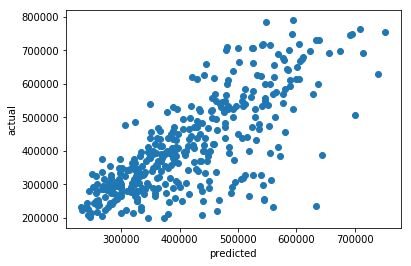

In [19]:
gb_pred = fitted_models['rf   '].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')

with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf   '].best_estimator_, f)
